<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/animate_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from my_func_pkg import comulative_return
import yfinance as yf

In [4]:
btc=yf.download('BTC-USD',interval='1D')

[*********************100%***********************]  1 of 1 completed


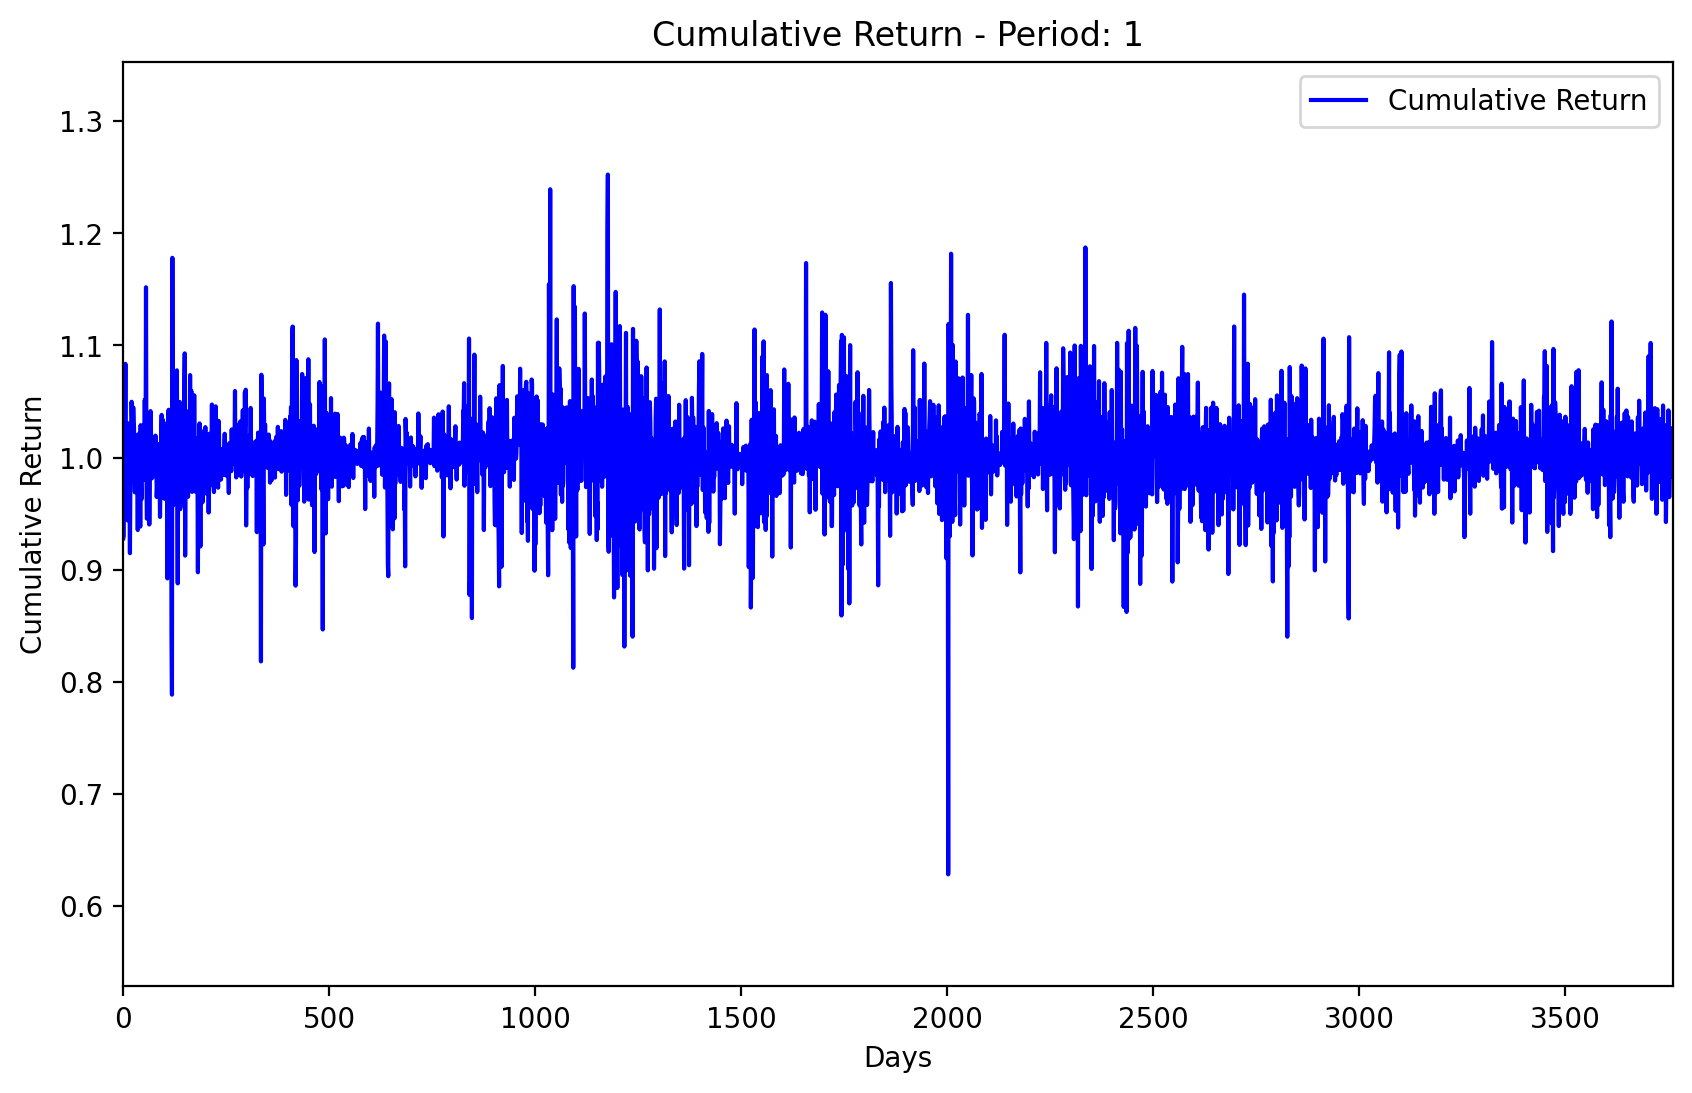

In [25]:
# داده‌های بسته شدن قیمت
close_prices = btc['Close'].values[:,0]

# ایجاد شکل و محور
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)  # افزایش اندازه و کیفیت
line, = ax.plot([], [], 'b-', label='Cumulative Return')

# تنظیم محدوده محورها
ax.set_xlim(0, len(close_prices))
ax.set_title('Cumulative Return Animation')
ax.set_xlabel('Days')
ax.set_ylabel('Cumulative Return')
ax.legend()

# تابع به‌روزرسانی
def update(period):
    y_data = comulative_return(close_prices, period)
    x_data = np.arange(len(y_data))
    line.set_data(x_data, y_data)
    ax.set_ylim(np.nanmin(y_data)-0.1, np.nanmax(y_data) + 0.1)
    ax.set_title(f'Cumulative Return - Period: {period}')
    return line,

# ایجاد انیمیشن
ani = FuncAnimation(fig, update, frames=np.arange(1, 366), blit=True)

# نمایش انیمیشن
plt.show()





In [26]:
ani.save('cumulative_return_animation_high_quality.mp4', writer='ffmpeg', dpi=200, fps=60)